# Libraries

In [23]:
import csv
import gensim
import sys
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import cluster

First we load our model.

In [3]:
model_gnvn300 = gensim.models.KeyedVectors.load_word2vec_format('../model/GoogleNews-vectors-negative300.bin', binary=True)

First of all, to make and collect words we traverse all comments and make our dictionary. For this approch, we define the function `create_dictionary(file)` which by getting the csv file, returns the dictionary.

In [4]:
def create_dictionary(file):
    csvreader = csv.reader(file)

    next(csvreader)

    dict_all = dict()
    # i = 0
    for row in csvreader:
        # if i == 4: break
        for word in row[1].split():
            my_word = ''
            for c in word:
                if (c >= 'a' and c <= 'z') or (c >= 'A' and c <='Z'):
                    my_word += c
            # print(my_word)
            try:
                dict_all[my_word] = model_gnvn300.get_vector(key=my_word)
            except KeyError:
                pass
    
    return dict_all
    


Now, let's find all words with their vectors with the help of the function `create_dictionary(file)`.

In [5]:
words_vecs = create_dictionary(open('../dataset/train.csv'))

Now we want to find the best values for `K` and `C_target` by testing the clustring algorithm for a part of data in the `train.csv` file.

In [39]:
sse = []
vecs = list(words_vecs.values())
len_vecs = len(vecs)

len_vecs_this = int(len(vecs) / 25)
vecs_this = vecs[0:len_vecs_this]

for k in range(40, 70):
  kmeans = KMeans(n_clusters = k).fit(vecs_this)
  centroids = kmeans.cluster_centers_
  pred_clusters = kmeans.predict(vecs_this)
  curr_sse = 0
  
  # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
  for i in range(len_vecs_this):
    # print(i, len_vecs_this)
    curr_center = centroids[pred_clusters[i]]
    # curr_sse += (vecs_this[i] - curr_center[0]) ** 2 + (vecs_this[i] - curr_center[1]) ** 2
    curr_sse += np.linalg.norm(vecs_this[i] - curr_center)
    
  sse.append(curr_sse)

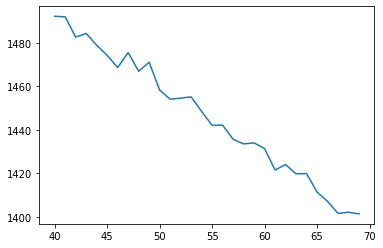

In [41]:
plt.plot([i for i in range(40, 70)], sse)

In [5]:
# for k in range(2, 6):
#     max_ri = -1                                     # `max_ri` stores max `Rand Index`
#     max_k_ct_ri:list                                # `max_k_ct_ri` stores `K` and `C_target` which have the maximum `Rand Index` reptresented by the vector [k, c_target, ri]
#     all_k_ct_ri = []                                # `all_k_ct_ri` sotres all `k`, `C_target` and `Rand Index` represented by the vector [k, c_target, ri]
#     for c_target in range(10, 16):
#         len_data = len(words_vecs.values())
#         words_vdcs_values = list(words_vecs.values())
#         print(len_data)
#         my_cluster = cluster.Our_clsuter_af(N=int(len_data/25), K=k, C_target=c_target, G=2, data=words_vdcs_values[0:int(len_data/25)])   # we test on 1/4 of our training data
#         my_cluster.run_algorithm()
#         ri, ri_str_info = my_cluster.rand_index()
#         this_k_ct_ri = [k, c_target, ri]
#         if ri > max_ri:
#             max_ri = ri
#             max_k_ct_ri = this_k_ct_ri

16828


IndexError: list index out of range